In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("5-studyhours.csv")

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [5]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


Buralarda veri setime göz gezdirdim. Sadece 33 tane satır varmış bunu öğrenmiş oldum. 2 tane ise kolon bulunuyor. İkisindeki verilerde float türündeymiş. Bunları anlamış oldum.

Buraya bir tane scatter plot çizerek içeriğini görmeye çalışayım.

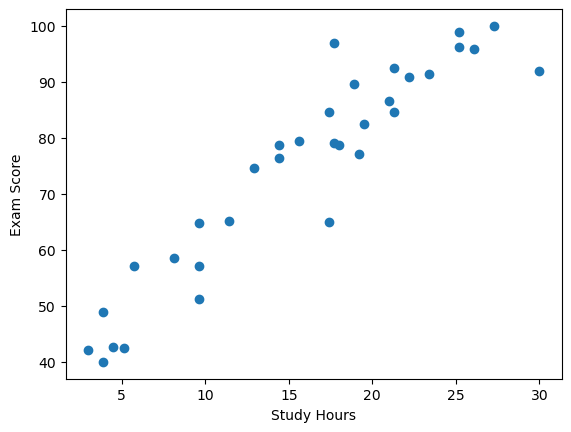

In [6]:
plt.scatter(df["Study Hours"],df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

----
# INDEPENDENT AND DEPENDENT FEATURES

Bu işlerin raconu olacak şekilde girdi genelde X (büyük X), çıktı ise y (küçük y) ile yazılır. Ama dikkat edilmesi gereken şey X değerlerini python bizden dataFrame olarak ister. Bu yüzden aşağıdaki gibi

X =df[["Study Hours"]]

iki tane köşeli parantez içerisinde X değerini alırız. Hani başka girdiler de olabilir vs diyerek. y çıktısını normal tek parantezde yazarız.

y =df[["Exam Score"]]

In [7]:
X = df[["Study Hours"]]
y = df["Exam Score"]

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
type(y)

pandas.core.series.Series

---
# TEST TRAIN SPLIT

Veri setini modeli eğitmek ve test etmek için ikiye ayıracağız. Test verisini eğittiğimiz modelin başarısını ölçmek için kullanacağız.

In [10]:
from sklearn.model_selection import train_test_split    # Bu split işlemini yapmak için kullanacağımız sklearn kütüphanesi

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 36)

X_train, x_test, y_train, y_test  şeklinde olan bu yazım standart olacak ve hep bu şekilde yazmamız gerekecek. 

test_size = 0.2 diyerek yüzde 20'sinin test için kullanılmasını istedim. Geri kalan kısmı eğitim için kullanılacak. 

random_state = 36 diyerek ise tekrar tekrar çalıştırırsam aynı bölmeyi yapsın diye oluşturuldu. 

Veri setini bu şekilde ayırmak çok önemli. Ekstra gerekli ayarlama yapmak gerekiyorsa üzerine gelip shift + tab yaparak detaylı özelliklerini görebiliriz.

---
# STANDARDIZE THE DATA SET

In [12]:
from sklearn.preprocessing import StandardScaler    # Bu işlemi yapmak için kullanacağımız sklearn kütüphanesi

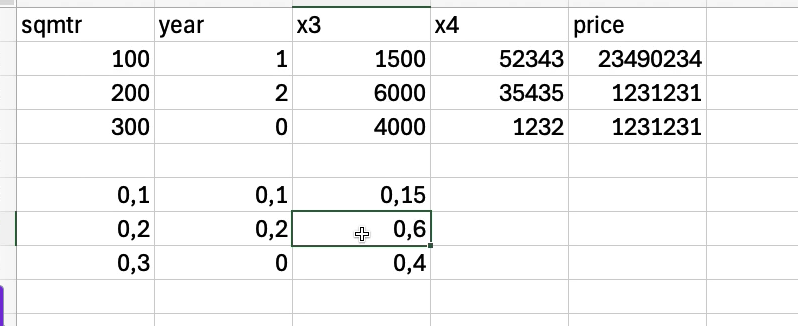

Bu tarz bir işlem yapıp mantıklı algoritmalar elde etmeye çalışacağız.

Teknik olarak: Her özelliği (feature) ortalaması 0, standart sapması 1 olacak şekilde dönüştürürüz.

Model, "gelir" çok büyük olduğu için daha önemli sanabilir, ama bu her zaman doğru değildir. Standartlaştırma yapmazsak, model ağırlıklı olarak büyük sayılara göre öğrenir.

In [13]:
#balanced featur values
#efficient gradient descent
#l1, l2

# Standartlaştırma işlemi bunlara yarıyor.

In [14]:
X_train    # Standartlaştırma yapmadan önceki X_train

,Study Hours
29,19.5
23,3.0
16,5.7
11,26.1
3,11.4
14,21.0
25,5.1
21,8.1
18,17.4
24,9.6


In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train    #Bu da standartkaştırma yaptıktan sonraki X_train değerleri

array([[ 0.61533794],
       [-1.64090117],
       [-1.2716984 ],
       [ 1.51783358],
       [-0.49227035],
       [ 0.82045058],
       [-1.35374346],
       [-0.94351817],
       [ 0.32818023],
       [-0.73840552],
       [ 0.36920276],
       [ 0.86147311],
       [-0.08204506],
       [-1.51783358],
       [-0.08204506],
       [ 0.57431541],
       [ 0.53329288],
       [ 0.32818023],
       [ 2.05112646],
       [ 0.08204506],
       [-0.73840552],
       [-0.73840552],
       [ 1.39476599],
       [ 1.14863082],
       [-1.43578852],
       [ 0.41022529]])

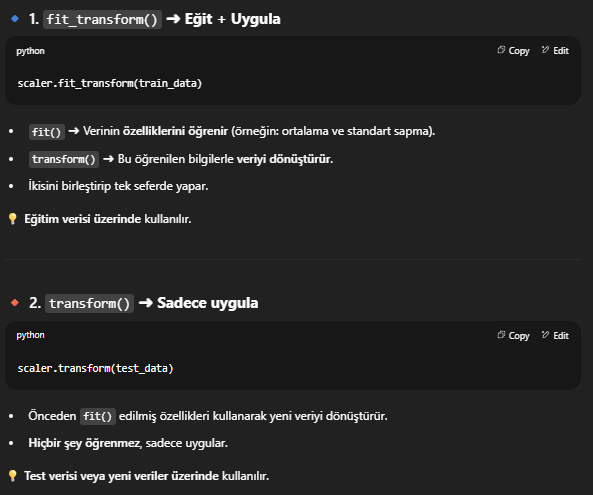

Burada neden train verisine fit_transform(), test verisine neden sadece transform() uyguladığımızı görüyoruz. Gerçekçi bir model eğitimi için test verisi eğitim verisinden öğrenilen kurallara göre işlenmeli. Test verisini fit edersen, veri sızdırma (data leakage) olur ve modelin gerçek performansı çarpıtılır.

---
# MODEL EĞİTMEK

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regression = LinearRegression()

In [20]:
regression.fit(X_train, y_train)

LinearRegression()

Burada yazdığımız şekilde bu basitlikle direkt Lineer Regresyon modelimizi eğitebiliyoruz. Şimdi denklem ne çıkmış onu görelim.

In [21]:
print("Coefficent : " , regression.coef_)
print("Intercept : ", regression.intercept_)

Coefficent :  [16.62090879]
Intercept :  71.61923076923077


Bu denklemin şu olduğunu bize gösteriyor :

*y = 71.61 + 16.62x*

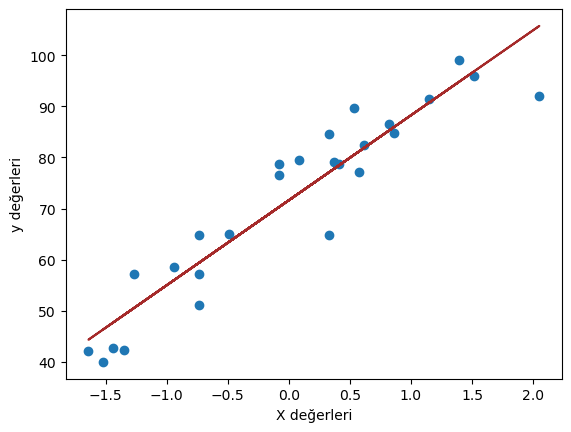

In [22]:
plt.scatter(X_train, y_train)
plt.xlabel("X değerleri")
plt.ylabel("y değerleri")
plt.plot(X_train, regression.predict(X_train), "brown")
plt.show()

Şimdi aşağıda x değeri 20 olursa yani 20 saat çalışırsa kaç gelir onu tahmin etmeye çalışacağız.

In [23]:
regression.predict([[20]])   # Burada dediğim gibi iki kapalı parantez içerisine yazmamız gerekiyor.

array([404.03740665])

Gördüğümüz üzere 400 küsürlü bir değer çıktı ama bu değer hatalı. Bunun sebebi ise biz bu X girdilerini scale ederek vermiştik. O yüzden tahmin yaparken de scale etmemiz gerekiyor.

In [24]:
regression.predict(scaler.transform([[20]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([82.98309269])

Bu şekilde predict içerisinde transform ederek verirsek gerçekte 20 saat çalışan birinin modelin tahminine göre 82.9 alacağını görmüş oluruz.

---
# MODELİ TEST ETMEK

Modelin kendi içerisinde başarısını ölçmek istiyorsak R^2 vs kullanabiliriz. Başka modellerle kıyaslamak için MSE falan kullanılabilir.

In [25]:
y_pred_test = regression.predict(X_test)

In [26]:
y_test

31     96.2
15     97.0
10     92.4
20     49.0
17     74.7
13    100.0
7      90.8
Name: Exam Score, dtype: float64

Ben normalde y_test kısmında gerçek çalışma ve gerçek alınan skorlardan oluşan bir test verisi saklıyordum. Bu test verisi ile bu verinin predict edilmiş halini kıyaslayacağım.

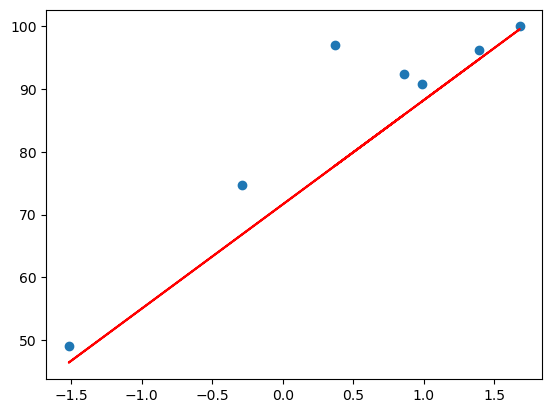

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regression.predict(X_test) , "r")
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print("mse : ", mse)
print("mae : ", mae)
print("rmse : ", rmse)

mse :  70.09408433907734
mae :  5.829955546072057
rmse :  8.372220992011458


Bunlar tek başlarına oldukları için bize çok bir fikir vermez.

In [30]:
r2 = r2_score(y_test, y_pred_test)
print("r2 score : ", r2)

r2 score :  0.7523445121956382


In [31]:
#adjusted R-squared
# Bunu internetten copy past yaparak bulabililirsiniz dedi.
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7028134146347659